# SQLite 02 - SQL 과 DataFrame

<img src="http://sqlite.com/images/sqlite370_banner.gif" >


#### 2016 이승준 fb.com/plusjune

# SQLite and  DataFrame
* df = pd.read_sql_query(query, con)
* df.to_sql(table_name, con)

In [1]:
%matplotlib inline
from IPython.display import display, Image

In [2]:
import sqlite3
import pandas as pd

In [3]:
query = "SELECT * FROM sqlite_master WHERE type='table'"

con = sqlite3.connect('test_news.db3')
with con:
    df = pd.read_sql_query(query, con)
    
df

,type,name,tbl_name,rootpage,sql
0,table,news,news,2,"CREATE TABLE news (id varchar(20), time dateti..."
1,table,maekyung,maekyung,3,"CREATE TABLE ""maekyung"" (\n""index"" INTEGER,\n ..."


In [4]:
con = sqlite3.connect('test_news.db3')
df = pd.read_sql_query('SELECT * FROM news', con)
df

,id,time,title,agency
0,0003024670,2013-08-29 11:39,국민은행 가족친화 기업에 금리 인하,매일경제
1,0003024522,2013-08-29 09:03,美양적완화 축소는 은행업종에 긍정적,매일경제
2,0002464356,2013-08-29 08:00,"<진화하는 MTS> KB투자증권, KB스마톡S",헤럴드생생뉴스
3,0003106995,2013-08-29 07:03,"LG상사, STX에너지 인수전에 KB금융 컨소시엄",머니투데이


In [5]:
con = sqlite3.connect('test_news.db3')
df = pd.read_sql_query('SELECT * FROM news', con, index_col='id')
df['time'] = pd.to_datetime(df['time'])
df

,time,title,agency
id,,,
0003024670,2013-08-29 11:39:00,국민은행 가족친화 기업에 금리 인하,매일경제
0003024522,2013-08-29 09:03:00,美양적완화 축소는 은행업종에 긍정적,매일경제
0002464356,2013-08-29 08:00:00,"<진화하는 MTS> KB투자증권, KB스마톡S",헤럴드생생뉴스
0003106995,2013-08-29 07:03:00,"LG상사, STX에너지 인수전에 KB금융 컨소시엄",머니투데이


# 조건부 읽기

In [6]:
con = sqlite3.connect('test_news.db3')
query = 'SELECT time, title FROM news WHERE agency = "매일경제"'
df = pd.read_sql_query(query, con)

# 테이블에 쓰기

In [7]:
con = sqlite3.connect('test_news.db3')
df.to_sql('maekyung', con, if_exists='replace')

# 환율 데이터 테이블

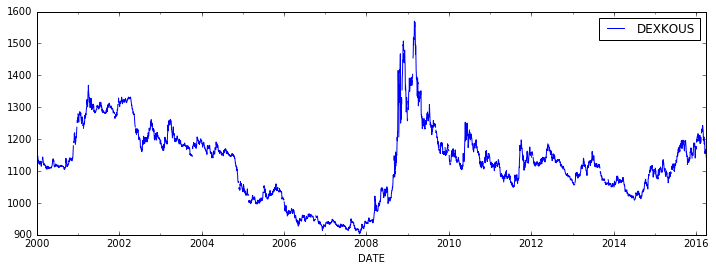

In [20]:
import datetime
from pandas_datareader import data

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2016, 3, 30)

dexkous = data.get_data_fred('DEXKOUS', start=start, end=end)
dexkous.plot(figsize=(12,4))

In [21]:
con = sqlite3.connect('dex.db3')
dexkous.to_sql('dexkous', con, if_exists='replace')

query = 'SELECT * FROM dexkous'
df = pd.read_sql_query(query, con)

dexkous.tail()

,DEXKOUS
DATE,
2016-03-24,1168.09
2016-03-25,1168.19
2016-03-28,1163.39
2016-03-29,1164.69
2016-03-30,1142.02
